# Использование линейной регрессии для предсказания рейтинга вина
## Знакомство с данными

In [101]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')

C:\Users\sadeyes\AppData\Local\Temp\ipykernel_472\2754509355.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [102]:
original_data_red = pd.read_csv('data/winequality-red.csv', sep=';')
data_red = original_data_red.copy()
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Attribute Information:

Input variables (based on physicochemical tests):
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol

Output variable (based on sensory data):
* 12 - quality (score between 0 and 10)



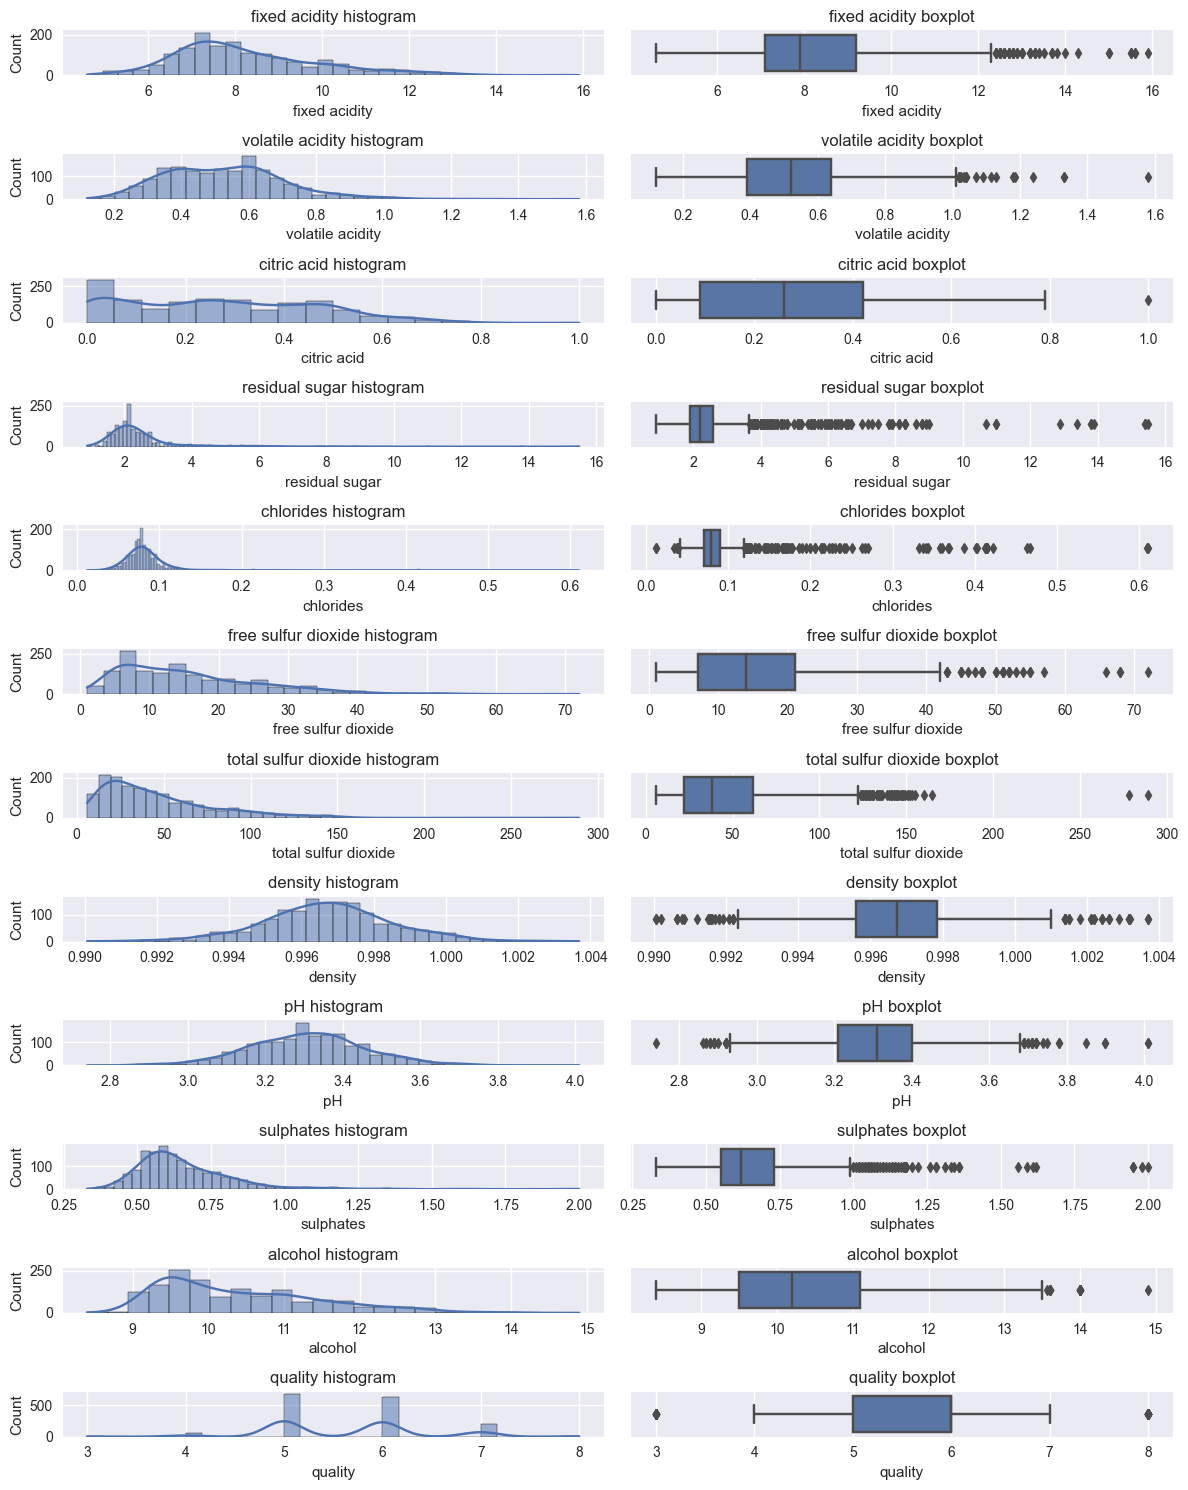

In [103]:
def make_histbox(data, features:list):
    fig, axs = plt.subplots(len(features), 2, figsize=(12, 15))
    for feature, row in zip(features, range(len(features))):
        ax, ay = axs[row, 0], axs[row, 1]
        sns.histplot(data, x=feature, ax=ax, kde=True)
        sns.boxplot(data, x=feature, ax=ay)
        ax.set_title(feature + ' histogram')
        ay.set_title(feature + ' boxplot')
    fig.tight_layout()
make_histbox(data_red, data_red.columns)

In [104]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## EDA

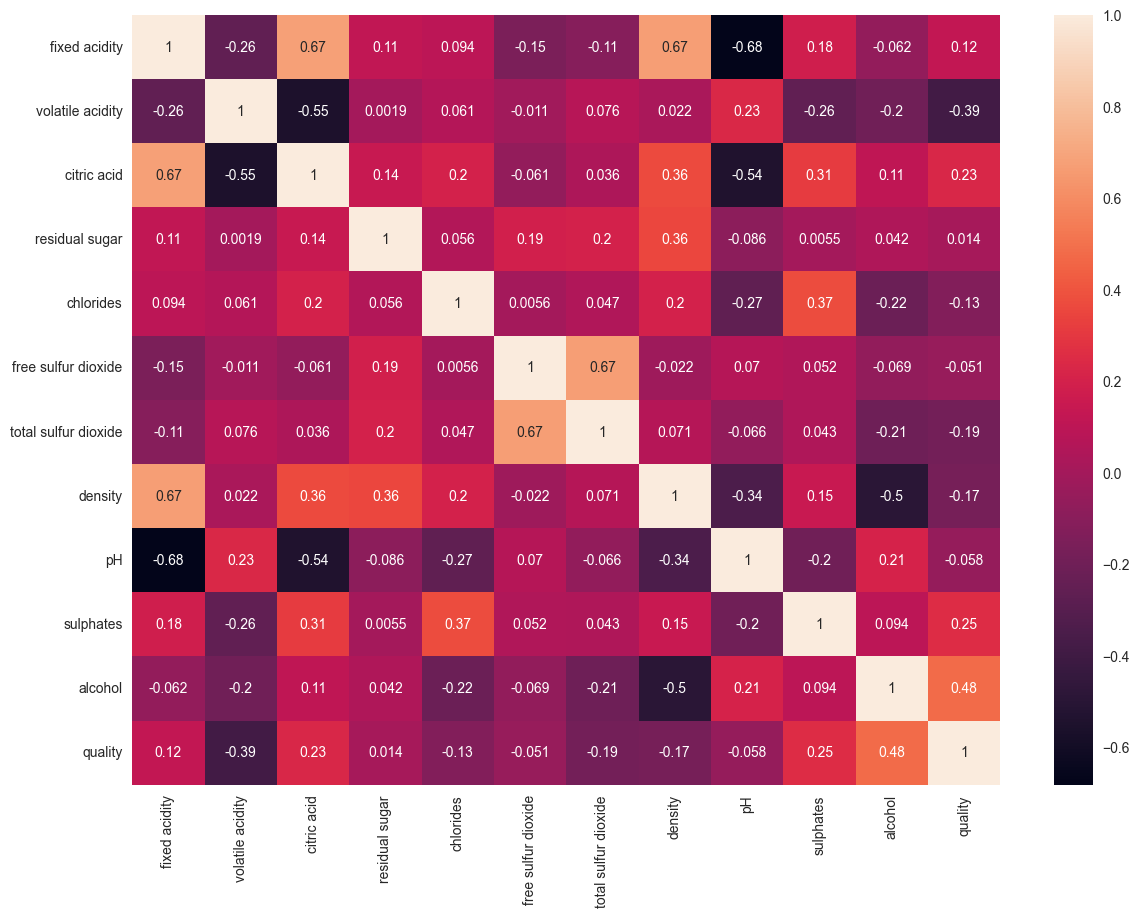

In [105]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(data_red.corr(), annot=True, ax=ax);

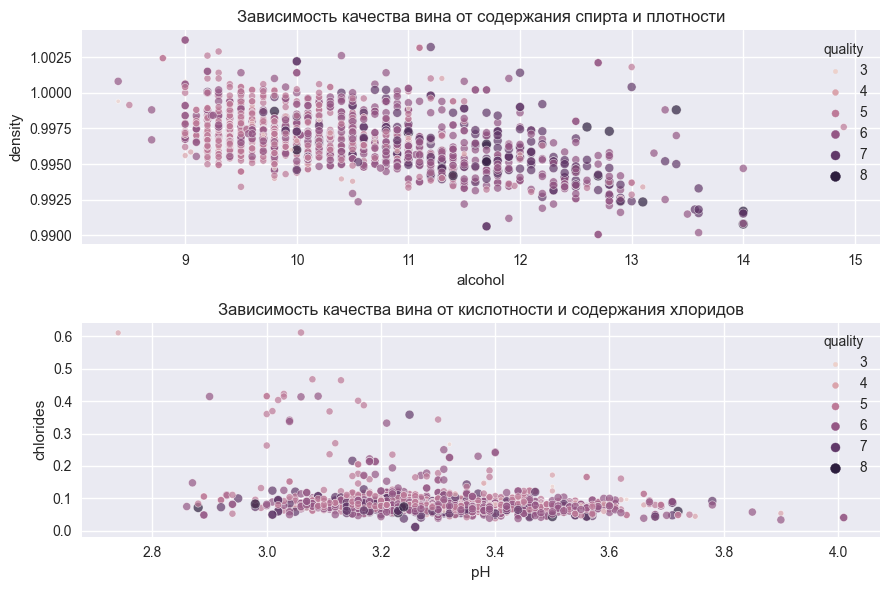

In [106]:
fig, ax = plt.subplots(2, figsize=(9, 6))
sns.scatterplot(
    data_red, 
    x='alcohol', 
    y='density', 
    hue='quality', size='quality',
    alpha=0.7,
    sizes=(10, 50),
    ax=ax[0]
)
sns.scatterplot(
    data_red, 
    x='pH', 
    y='chlorides', 
    hue='quality', size='quality',
    alpha=0.7,
    sizes=(10, 50),
    ax=ax[1]
)
ax[0].set_title('Зависимость качества вина от содержания спирта и плотности')
ax[1].set_title('Зависимость качества вина от кислотности и содержания хлоридов');
fig.tight_layout()

## Построение модели линейной регрессии
### Аналитическое решение OLS (метод наименьших квадратов)

In [107]:
X, y = data_red.drop(columns='quality'), data_red['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_test.shape)

(1119, 11) (480,)


In [108]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.coef_

array([ 2.34704718e-02, -1.09961969e+00, -2.47859776e-01,  7.73785620e-03,
       -1.67359251e+00,  4.55041815e-03, -3.26389168e-03, -1.42395563e+01,
       -3.19247444e-01,  8.12824701e-01,  2.91991158e-01])

In [109]:
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

def print_metrics(y_train_predict, y_test_predict):
    print('Train:')
    print('R^2:', np.round(metrics.r2_score(y_train, y_train_predict), 3))
    print('MAE:', np.round(metrics.mean_absolute_error(y_train, y_train_predict), 2))
    print('MAPE, %:', np.round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print()
    print('Test')
    print('R^2:', np.round(metrics.r2_score(y_test, y_test_predict), 3))
    print('MAE:', np.round(metrics.mean_absolute_error(y_test, y_test_predict), 2))
    print('MAPE, %:', np.round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

print_metrics(y_train_predict, y_test_predict)

Train:
R^2: 0.361
MAE: 0.5
MAPE, %: 9.0

Test
R^2: 0.351
MAE: 0.51
MAPE, %: 9.0


### Численное решение (градиентный спуск)

In [110]:
sgd_model = linear_model.SGDRegressor()
mm_scaler = preprocessing.MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)
sgd_model.fit(X_train_scaled, y_train)
sgd_model.coef_

array([ 0.70120742, -0.02677752,  0.6510096 ,  0.00679201,  0.09364828,
        0.30019221, -0.19093511,  0.50786558,  1.37962701,  0.82714778,
        2.05788674])

In [111]:
y_train_predict = sgd_model.predict(X_train_scaled)
y_test_predict = sgd_model.predict(X_test_scaled)

print_metrics(y_train_predict, y_test_predict)

Train:
R^2: 0.234
MAE: 0.55
MAPE, %: 10.0

Test
R^2: 0.219
MAE: 0.56
MAPE, %: 10.0


### Полиномиальные признаки с регуляризацией

(480, 77)


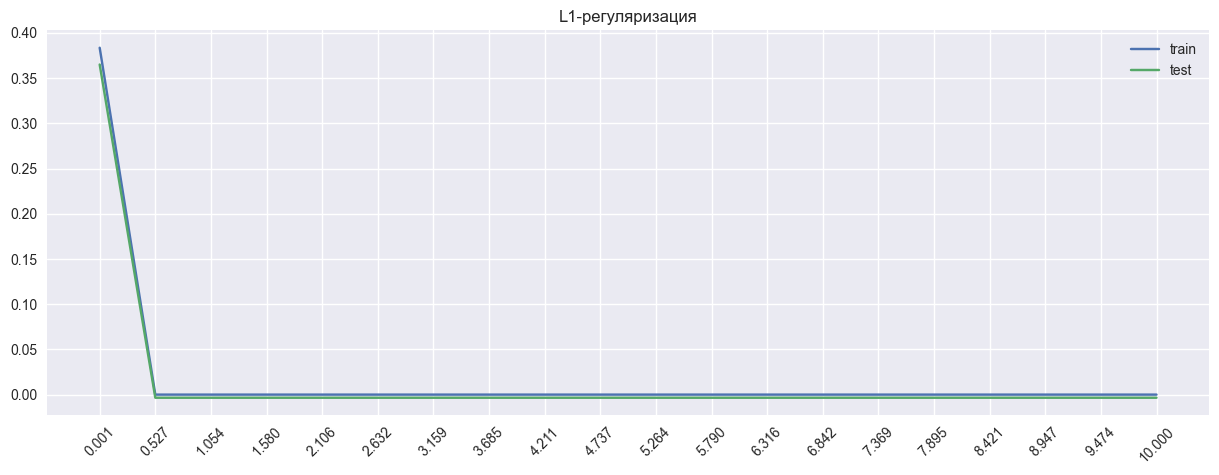

In [112]:
poly = preprocessing.PolynomialFeatures(
    degree=2,
    include_bias=False
)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
print(X_test_scaled_poly.shape)
      
train_scores = []
test_scores = []
alpha_list = np.linspace(0.001, 10, 20)
for alpha in alpha_list:
    lasso_model = linear_model.Lasso(alpha=alpha, max_iter=30000)
    lasso_model.fit(X_train_scaled_poly, y_train)
    y_train_predict_poly = lasso_model.predict(X_train_scaled_poly)
    y_test_predict_poly = lasso_model.predict(X_test_scaled_poly)
    r2_train = metrics.r2_score(y_train, y_train_predict_poly)
    r2_test = metrics.r2_score(y_test, y_test_predict_poly)
    train_scores.append(r2_train)
    test_scores.append(r2_test)

fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(y=train_scores, x=alpha_list, ax=ax, label='train')
sns.lineplot(y=test_scores, x=alpha_list, ax=ax, label='test')
ax.set_xticks(alpha_list)
ax.xaxis.set_tick_params(rotation=45)
ax.set_title('L1-регуляризация');

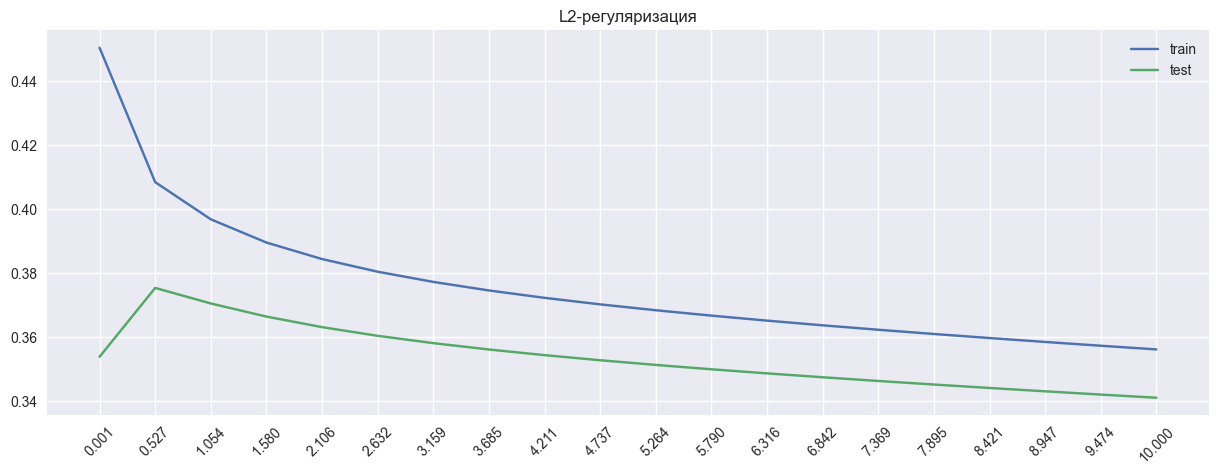

In [113]:
train_scores = []
test_scores = []
alpha_list = np.linspace(0.001, 10, 20)
for alpha in alpha_list:
    ridge_model = linear_model.Ridge(alpha=alpha, max_iter=30000)
    ridge_model.fit(X_train_scaled_poly, y_train)
    y_train_predict_poly = ridge_model.predict(X_train_scaled_poly)
    y_test_predict_poly = ridge_model.predict(X_test_scaled_poly)
    r2_train = metrics.r2_score(y_train, y_train_predict_poly)
    r2_test = metrics.r2_score(y_test, y_test_predict_poly)
    train_scores.append(r2_train)
    test_scores.append(r2_test)

fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(y=train_scores, x=alpha_list, ax=ax, label='train')
sns.lineplot(y=test_scores, x=alpha_list, ax=ax, label='test')
ax.set_xticks(alpha_list)
ax.xaxis.set_tick_params(rotation=45)
ax.set_title('L2-регуляризация');

In [114]:
lasso_model = linear_model.Lasso(alpha=0.001, max_iter=30000)
lasso_model.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = lasso_model.predict(X_train_scaled_poly)
y_test_predict_poly = lasso_model.predict(X_test_scaled_poly)
print_metrics(y_train_predict_poly, y_test_predict_poly)

Train:
R^2: 0.384
MAE: 0.49
MAPE, %: 9.0

Test
R^2: 0.365
MAE: 0.51
MAPE, %: 9.0


Посмотрим, как наша модель описывает данные

Text(0.5, 1.0, 'Распределение эталонных ответов и предсказанных')

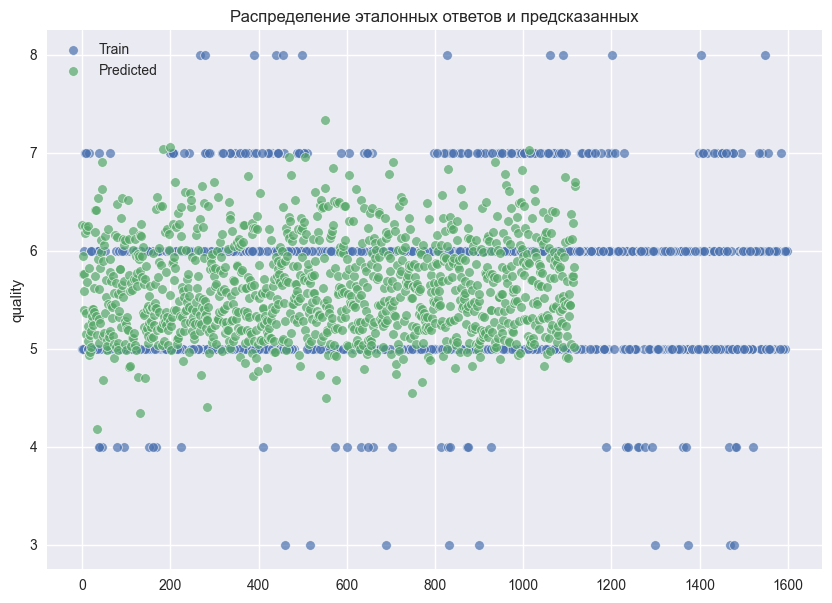

In [115]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(y_train, label='Train', alpha=0.7)
sns.scatterplot(y_train_predict_poly, label='Predicted', alpha=0.7)
ax.set_title('Распределение эталонных ответов и предсказанных')

## Вывод

Наилучшую метрику показала полиномиальная модель с L1-регуляризацией со значением $\alpha = 0.001$